<a href="https://colab.research.google.com/github/HarikaTejaswiniRaju/staticws1/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix, roc_curve, auc

In [3]:
data = pd.read_csv("/content/sample_data/creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

# Calculate outlier fraction
outlierFraction = len(fraud) / float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))

# Details of valid transactions
print("Details of valid transaction")
print(valid.Amount.describe())

0.002588729071887015
Fraud Cases: 169
Valid Transactions: 65283
Details of valid transaction
count    65283.000000
mean        96.279722
std        270.360076
min          0.000000
25%          7.680000
50%         26.250000
75%         88.000000
max      19656.530000
Name: Amount, dtype: float64


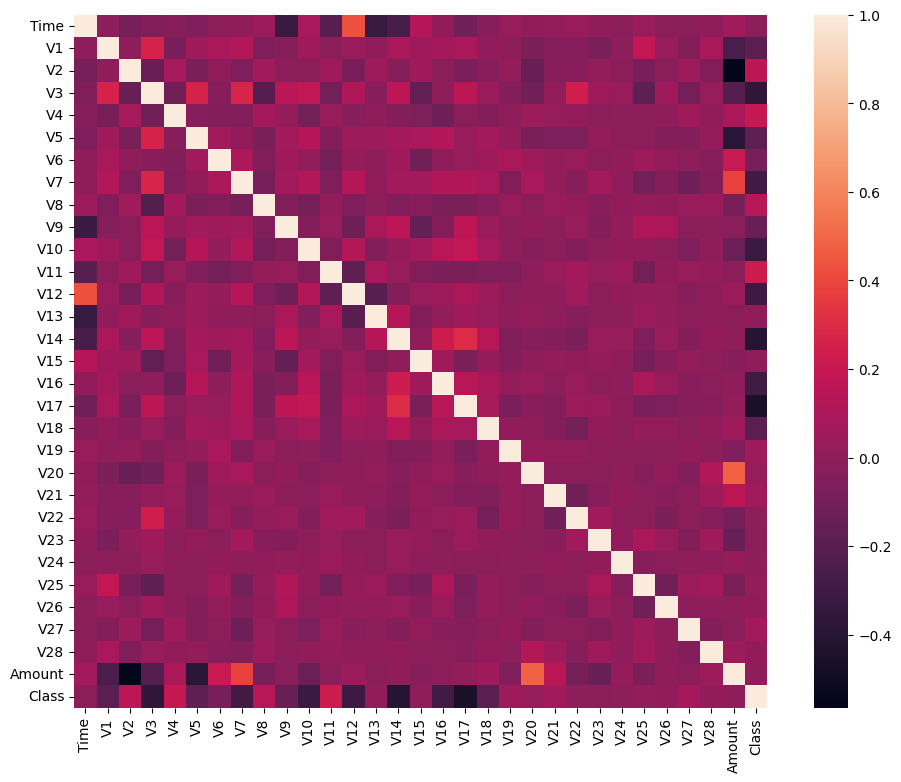

In [ ]:

# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True)
plt.show()

In [ ]:
# Dividing the X and the Y from the dataset
X = data.drop(['Class'], axis=1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

(65453, 30)
(65453,)


In [ ]:
# Split the data into training and testing sets
xData = X.values
yData = Y.values
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4, random_state=42)


In [ ]:
# Validate the dataset
print(f"NaN in xTrain: {np.isnan(xTrain).any()}")
print(f"NaN in yTrain: {np.isnan(yTrain).any()}")
print(f"NaN in xTest: {np.isnan(xTest).any()}")

NaN in xTrain: True
NaN in yTrain: True
NaN in xTest: False


In [ ]:

# Handle missing values in yTrain
if np.isnan(yTrain).any():
    imputer = SimpleImputer(strategy='most_frequent')
    yTrain = imputer.fit_transform(yTrain.reshape(-1, 1)).ravel()

In [ ]:
# Handle missing values in xTrain and xTest
if np.isnan(xTrain).any() or np.isnan(xTest).any():
    imputer = SimpleImputer(strategy='mean')
    xTrain = imputer.fit_transform(xTrain)
    xTest = imputer.transform(xTest)


In [ ]:
# Validate the dataset
print(f"NaN in xTrain: {np.isnan(xTrain).any()}")
print(f"NaN in yTrain: {np.isnan(yTrain).any()}")
print(f"NaN in xTest: {np.isnan(xTest).any()}")

NaN in xTrain: False
NaN in yTrain: False
NaN in xTest: False


In [ ]:
# Build and train the Random Forest model
rfc = RandomForestClassifier(
    n_estimators=400,           # Number of trees in the forest
    max_depth=15,               # Maximum depth of each tree
    min_samples_split=4,        # Minimum samples needed to split a node
    min_samples_leaf=2,         # Minimum samples required at a leaf node
    max_features='sqrt',        # Number of features considered for a split
    bootstrap=True,             # Use bootstrapped samples for training
    random_state=42,            # Seed for reproducibility
    n_jobs=-1,                  # Use all processors for parallel computation
    criterion='entropy',        # Use entropy as the split criterion
    verbose=1                   # Prints progress of training
)
rfc.fit(xTrain, yTrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   56.5s finished


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=400, n_jobs=-1,
                       random_state=42, verbose=1)

In [ ]:
# Make predictions (probabilities for ROC curve)
yPredProb = rfc.predict_proba(xTest)[:, 1]  # Probabilities for the positive class


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.9s finished


In [ ]:
# Evaluate the model
yPred = rfc.predict(xTest)
acc = accuracy_score(yTest, yPred)
print(f"The accuracy is {acc}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s


The accuracy is 0.9993888931326865


[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.9s finished


The precision is 0.9655172413793104
The recall is 0.8
The F1-Score is 0.875
The Matthews correlation coefficient is 0.8785847469715569
Area Under Curve (AUC): 0.95


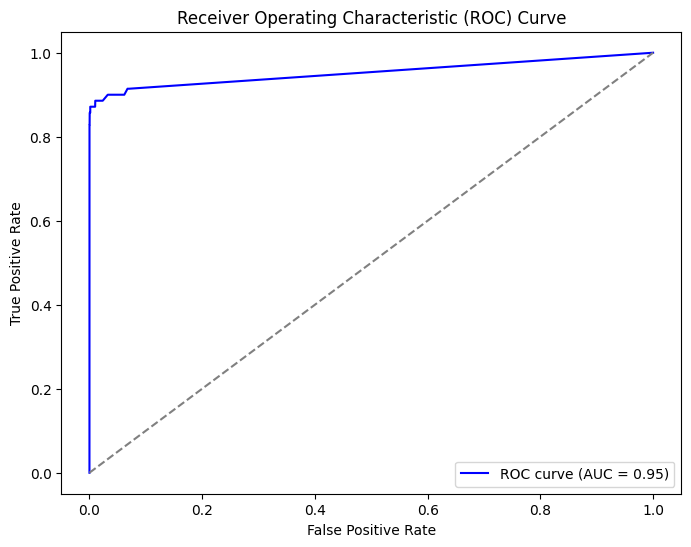

In [ ]:

prec = precision_score(yTest, yPred)
print(f"The precision is {prec}")

rec = recall_score(yTest, yPred)
print(f"The recall is {rec}")

f1 = f1_score(yTest, yPred)
print(f"The F1-Score is {f1}")

MCC = matthews_corrcoef(yTest, yPred)
print(f"The Matthews correlation coefficient is {MCC}")

# ROC curve
fpr, tpr, thresholds = roc_curve(yTest, yPredProb)  # Use predicted probabilities for ROC
roc_auc = auc(fpr, tpr)
print(f"Area Under Curve (AUC): {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


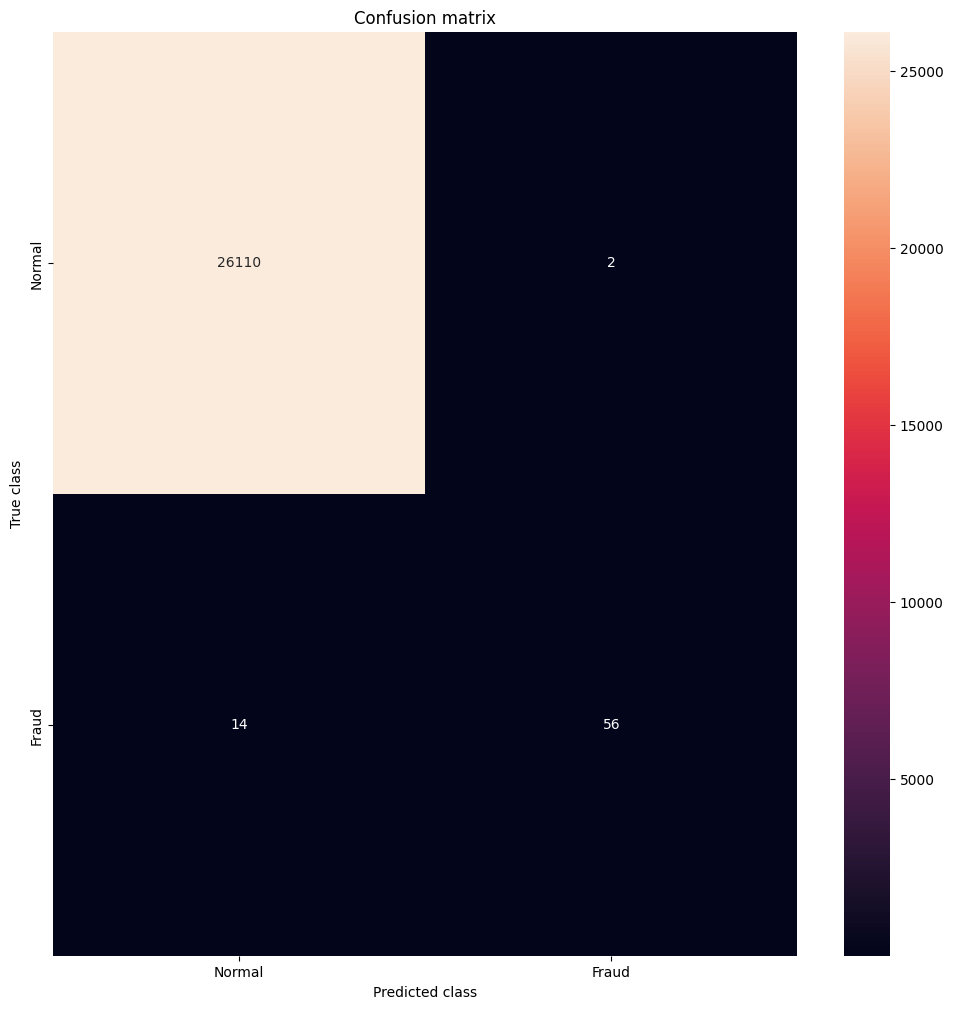

In [ ]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()